In [26]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.preprocessing import (MinMaxScaler, Normalizer, OneHotEncoder, StandardScaler, FunctionTransformer, RobustScaler)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split, StratifiedKFold, RandomizedSearchCV,cross_validate, cross_val_predict, learning_curve, validation_curve)
from sklearn.metrics import roc_curve,roc_auc_score, cohen_kappa_score, matthews_corrcoef,  average_precision_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,make_scorer, roc_auc_score, average_precision_score, accuracy_score)
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import precision_recall_curve



set_config(transform_output='pandas')


In [27]:

# Wczytanie danych z pliku 
df = pd.read_excel("ml_dane.xlsx")
display(df.head())

,płeć,pali,wykształcenie,liczba osób,typ szkoły,dochód roczny,srednia ocen sem,tryb nauki,zamieszkanie,problemy z rówieśnikami,czas do szkoły min,godzin nauki przed egzaminem,nadużywanie alkoholu,poziom stresu,korzystanie z korepetycji,czas spedzany tygodniu na social mediach w godz,ulubione social media,czy zdał egzamin
0,0,0,1,1,2,99511.02,4.09,2,4,1,22,51,0,4,0,17,4,1
1,1,1,4,2,1,143528.88,4.24,1,5,0,25,13,0,5,0,14,1,0
2,1,0,4,7,2,76887.63,3.29,3,3,1,24,27,0,6,1,24,3,0
3,0,0,4,3,2,91792.83,3.11,2,4,1,20,64,0,3,1,13,1,1
4,0,0,4,4,2,141099.41,4.16,3,2,1,27,14,0,6,0,14,3,0


In [28]:
# Wydzielenie X (zmienne objaśniające) i y (zmienna docelowa)
X = df.drop('czy zdał egzamin', axis=1)
y = df['czy zdał egzamin']

print('Typy zmiennych:')
print(df.dtypes)
print()

print(f'Zmienne predykcyjne X: {X.columns.tolist()}')
print(f'Zmienna celu        y: {y.name}')
print()
numeric_variables = X.select_dtypes(include=['int64', 'float64'])
numeric_variable_names = numeric_variables.columns.tolist()
print(f'Zmienne liczbowe: {numeric_variable_names}')
print()
non_numeric_variables = X.select_dtypes(exclude=['int64', 'float64'])
non_numeric_variable_names = non_numeric_variables.columns.tolist()
print(f'Zmienne tekstowe: {non_numeric_variable_names}')
print()


Typy zmiennych:
płeć                                                 int64
pali                                                 int64
wykształcenie                                        int64
liczba osób                                          int64
typ szkoły                                           int64
dochód roczny                                      float64
srednia ocen sem                                   float64
tryb nauki                                           int64
zamieszkanie                                         int64
problemy z rówieśnikami                              int64
czas do szkoły min                                   int64
godzin nauki przed egzaminem                         int64
nadużywanie alkoholu                                 int64
poziom stresu                                        int64
korzystanie z korepetycji                            int64
czas spedzany tygodniu na social mediach w godz      int64
ulubione social media                   

In [29]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)


shape_dict = {  "Dane": ["X", "y", "X_train", "y_train", "X_test", "y_test"],
                "Rozmiar": [X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape,],}

shape_df = pd.DataFrame(shape_dict)
display(shape_df)


prop = { 'Struktura danych "y_train"': y_train.value_counts(normalize=True) * 100,
        'Struktura danych "y_test"': y_test.value_counts(normalize=True) * 100 }

proporcje = pd.DataFrame(prop)
display(proporcje)


,Dane,Rozmiar
0,X,"(1000, 17)"
1,y,"(1000,)"
2,X_train,"(800, 17)"
3,y_train,"(800,)"
4,X_test,"(200, 17)"
5,y_test,"(200,)"


,"Struktura danych ""y_train""","Struktura danych ""y_test"""
czy zdał egzamin,,
1,50.875,51.0
0,49.125,49.0


Wyniki skuteczności modelu wg CV:


,fit_time,score_time,test_accuracy,test_f1
0,0.008687,0.002994,0.7250,0.744186
1,0.008972,0.005688,0.6750,0.690476
2,0.010997,0.004001,0.8500,0.860465
3,0.012379,0.005499,0.8000,0.794872
4,0.007002,0.003001,0.6625,0.689655
5,0.008998,0.002001,0.8250,0.840909
6,0.006999,0.000577,0.7500,0.750000
7,0.000000,0.000000,0.6625,0.682353
8,0.016277,0.000000,0.7625,0.771084
9,0.000000,0.000000,0.8250,0.825000


* średnia miara test_accuracy: 0.7537499999999999
* odchylenie standardowe : 0.07096800922481433


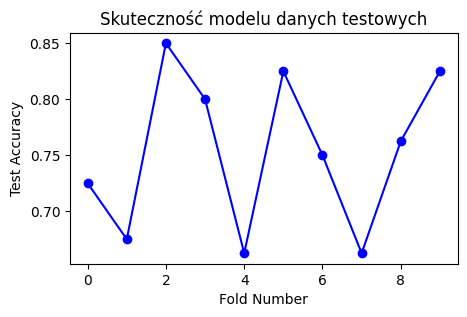

In [30]:

# Definicja modelu drzewa decyzyjnego
model = DecisionTreeClassifier(random_state=42)

# Stworzenie obiektu Cross-Validation (StratifiedKFold) do walidacji krzyżowej
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Ocena modelu za pomocą walidacji krzyżowej
cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring = {'accuracy': 'accuracy','f1': 'f1'})

score_train = pd.DataFrame(cv_results)
print('Wyniki skuteczności modelu wg CV:')
display(score_train)
print(f'* średnia miara test_accuracy: {score_train["test_accuracy"].mean()}')
print(f'* odchylenie standardowe : {score_train["test_accuracy"].std()}')

score_train["test_accuracy"].plot(kind = 'line',  marker='o',linestyle='-', color='b', title='Skuteczność modelu danych testowych', figsize=(5, 3), xlabel='Fold Number', ylabel='Test Accuracy')
plt.show()


,Max Depth,Mean Train Score,Std Train Score,Mean Validation Score,Std Validation Score
0,1,0.740972,0.004533,0.72125,0.048105
1,2,0.771389,0.011902,0.75250,0.051781
2,3,0.823889,0.007678,0.77375,0.042738
3,4,0.846806,0.009066,0.79375,0.046854
4,5,0.871250,0.008427,0.81125,0.047582
5,6,0.892361,0.005966,0.79500,0.051599
6,7,0.908056,0.006655,0.80250,0.046368
7,8,0.920417,0.008218,0.79750,0.055000
8,9,0.933056,0.009416,0.79375,0.055128
9,10,0.943611,0.011557,0.79000,0.054429


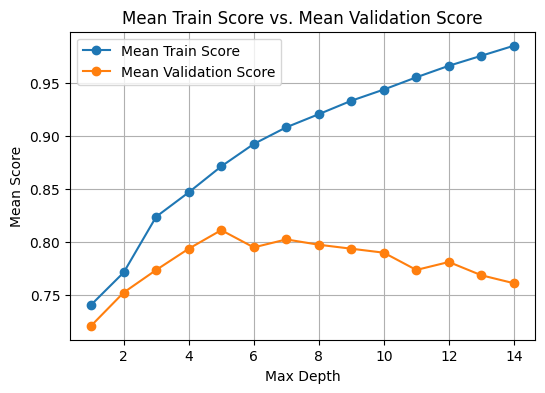

,Max Depth,Mean Train Error,Std Train Error,Mean Validation Error,Std Validation Error,różnica
0,1,0.26,0.00,0.28,0.05,-0.02
1,2,0.23,0.01,0.25,0.05,-0.02
2,3,0.18,0.01,0.23,0.04,-0.05
3,4,0.15,0.01,0.21,0.05,-0.05
4,5,0.13,0.01,0.19,0.05,-0.06
5,6,0.11,0.01,0.21,0.05,-0.10
6,7,0.09,0.01,0.20,0.05,-0.11
7,8,0.08,0.01,0.20,0.05,-0.12
8,9,0.07,0.01,0.21,0.06,-0.14
9,10,0.06,0.01,0.21,0.05,-0.15


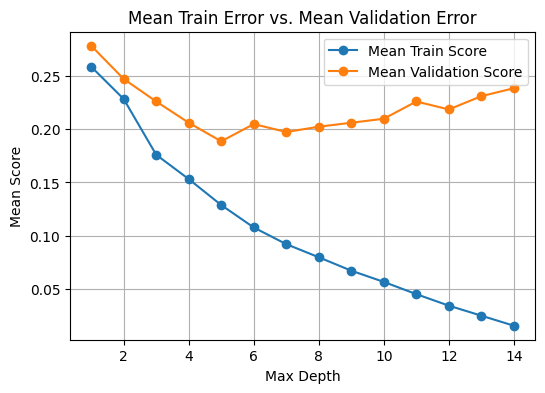

In [31]:

# Definiowanie zakresu hiperparametru max_depth
max_depth_values = np.arange(1, 15)

# Wykonywanie krzywej walidacji dla parametru max_depth
train_scores, test_scores = validation_curve(
                                estimator=DecisionTreeClassifier(random_state=42), X=X_train, y=y_train,
                                param_name='max_depth', param_range=max_depth_values, cv=cv, scoring='accuracy', n_jobs=-1)


mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
std_test_scores = np.std(test_scores, axis=1)
val = {
        'Max Depth': max_depth_values,
        'Mean Train Score': mean_train_scores,
        'Std Train Score': std_train_scores,
        'Mean Validation Score': mean_test_scores,
        'Std Validation Score': std_test_scores,}

df_val = pd.DataFrame(val)
display(df_val)


max_depth_values = df_val['Max Depth']
mean_train_scores = df_val['Mean Train Score']
mean_validation_scores = df_val['Mean Validation Score']

plt.figure(figsize=(6, 4))
plt.plot(max_depth_values, mean_train_scores, marker='o', label='Mean Train Score')
plt.plot(max_depth_values, mean_validation_scores, marker='o', label='Mean Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Score')
plt.title('Mean Train Score vs. Mean Validation Score')
plt.legend()
plt.grid(True)
plt.show()


mean_train_error = 1 - mean_train_scores
mean_test_error = 1 - mean_test_scores
std_train_error = std_train_scores
std_test_error = std_test_scores
err = {
        'Max Depth': max_depth_values,
        'Mean Train Error': mean_train_error,
        'Std Train Error': std_train_error,
        'Mean Validation Error': mean_test_error,
        'Std Validation Error': std_test_scores,}

df_err = pd.DataFrame(err)
df_err['różnica']=(df_err['Mean Train Error']-df_err['Mean Validation Error'])
display(df_err.round(2))



max_depth_values = df_err['Max Depth']
mean_train_err = df_err['Mean Train Error']
mean_validation_err = df_err['Mean Validation Error']

plt.figure(figsize=(6, 4))

plt.plot(max_depth_values, mean_train_err, marker='o', label='Mean Train Score')
plt.plot(max_depth_values, mean_validation_err, marker='o', label='Mean Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Score')
plt.title('Mean Train Error vs. Mean Validation Error')
plt.legend()
plt.grid(True)
plt.show()



 ================================= OCENA MODELU K-NN PREDYKCJA NA ZBIORZE TRENINGOWYM ============================


miara,TP,FP,FN,TN,accuracy,error_ratio,precision_pos,precision_neg,recall_pos,recall_neg,f1_score
wartość,304.0,89.0,63.0,344.0,0.81,0.19,0.773537,0.845209,0.828338,0.794457,0.8


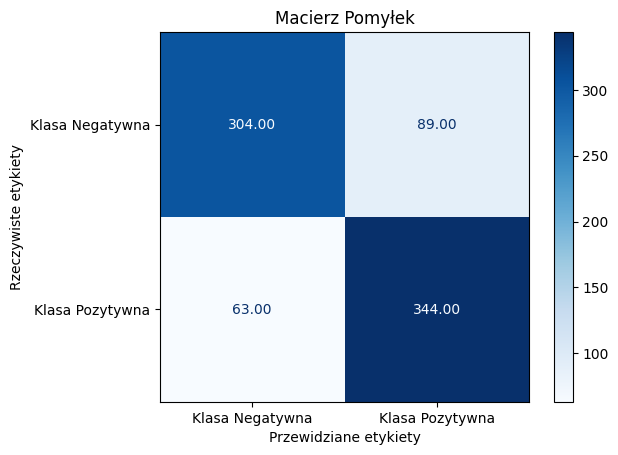

In [32]:

model = DecisionTreeClassifier(max_depth=5)

# Trenowanie modelu na całym zbiorze treningowym (opcjonalnie)
model.fit(X_train, y_train)

# Testowanie modelu na zbiorze testowym
y_pred = model.predict(X_test)

print(' ================================= OCENA MODELU K-NN PREDYKCJA NA ZBIORZE TRENINGOWYM ============================')


y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)


def score_train():
    cm_test = confusion_matrix(y_train, y_train_pred)
    TP, FP, FN, TN = cm_test.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_ratio = (FP + FN) / (TP + TN + FP + FN)
    precision_pos = TP / (TP + FP)
    precision_neg = TN / (TN + FN)
    recall_pos = TP / (TP + FN)
    recall_neg = TN / (TN + FP)
    f1_score = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
    data = {'miara': ['TP', 'FP', 'FN', 'TN','accuracy','error_ratio', 'precision_pos','precision_neg','recall_pos', 'recall_neg','f1_score'],
            'wartość': [TP, FP, FN, TN,accuracy,error_ratio, precision_pos,precision_neg,recall_pos, recall_neg,f1_score]}
    df = pd.DataFrame(data).set_index('miara')
    return df.T


display(score_train())

# Tworzymy wykres macierzy pomyłek
cm_train = confusion_matrix(y_train, y_train_pred)
classes = ['Klasa Negatywna', 'Klasa Pozytywna']  # Zdefiniuj nazwy klas
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Macierz Pomyłek")
plt.xlabel("Przewidziane etykiety")
plt.ylabel("Rzeczywiste etykiety")
plt.show()

--------------------------------------------------------------------------------
OCENA MODELU K-NN PREDYKCJA NA ZBIORZE TESTOWYM 



miara,TP,FP,FN,TN,accuracy,error_ratio,precision_pos,precision_neg,recall_pos,recall_neg,f1_score,roc_auc_test,cohen_kappa,matthews_corrcoef_score
wartość,78.0,20.0,24.0,78.0,0.78,0.22,0.795918,0.764706,0.764706,0.795918,0.78,0.769358,0.560176,0.560624


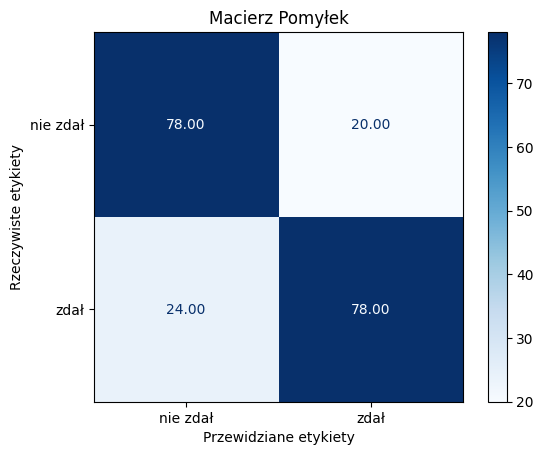

In [33]:
# Predykcja na danych testowych
y_test_pred = model.predict(X_test)

# Prawdopodobieństwo przynależności do klasy pozytywnej (klasa 1) dla danych testowych
y_test_proba = model.predict_proba(X_test)[:, 1]


def score_test():
    cm_test = confusion_matrix(y_test, y_test_pred)
    TP, FP, FN, TN = cm_test.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_ratio = (FP + FN) / (TP + TN + FP + FN)
    precision_pos = TP / (TP + FP)
    precision_neg = TN / (TN + FN)
    recall_pos = TP / (TP + FN)
    recall_neg = TN / (TN + FP)
    f1_score = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    matthews_corrcoef_score = matthews_corrcoef(y_test, y_test_pred)
    data = {'miara': ['TP', 'FP', 'FN', 'TN','accuracy','error_ratio', 'precision_pos','precision_neg','recall_pos', 'recall_neg','f1_score',
                      'roc_auc_test','cohen_kappa','matthews_corrcoef_score'],
            'wartość': [TP, FP, FN, TN,accuracy,error_ratio, precision_pos,precision_neg,recall_pos, recall_neg,f1_score,
                        roc_auc_test,cohen_kappa,matthews_corrcoef_score]}
    df = pd.DataFrame(data).set_index('miara')
    return df

print('-'*80)
print('OCENA MODELU K-NN PREDYKCJA NA ZBIORZE TESTOWYM ')
print()
display(score_test().T)

cm_test = confusion_matrix(y_test, y_test_pred)
classes = ['nie zdał', 'zdał']  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Macierz Pomyłek")
plt.xlabel("Przewidziane etykiety")
plt.ylabel("Rzeczywiste etykiety")
plt.show()

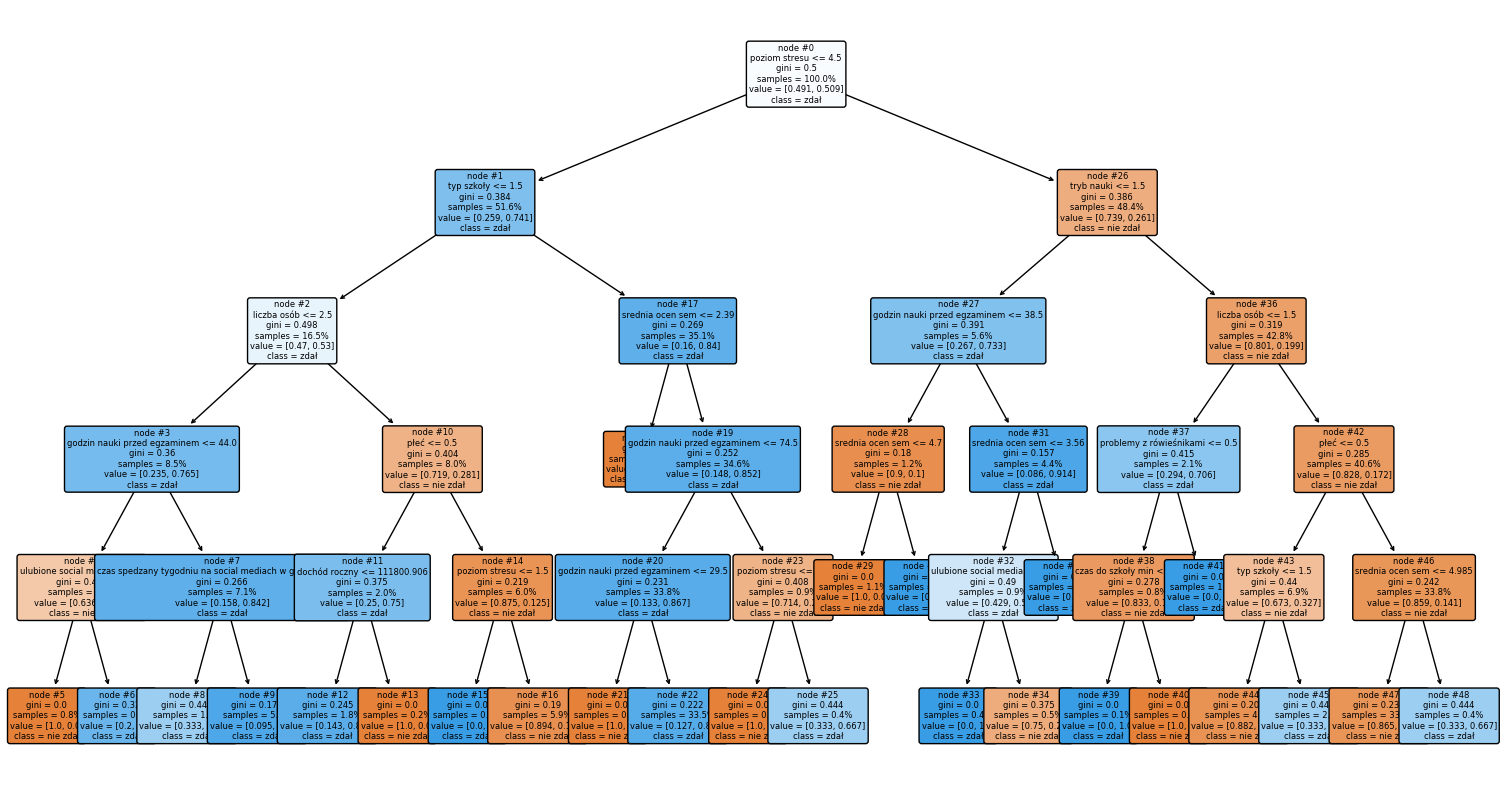

In [43]:
plt.figure(figsize=(19, 10))

# Ustawianie kolorów węzłów i liści
plot_tree(model, 
          filled=True, 
          rounded=True,
          class_names=['nie zdał', 'zdał'],
          feature_names=['płeć', 'pali', 'wykształcenie', 'liczba osób', 'typ szkoły',
                         'dochód roczny', 'srednia ocen sem', 'tryb nauki', 'zamieszkanie',
                         'problemy z rówieśnikami', 'czas do szkoły min',
                         'godzin nauki przed egzaminem', 'nadużywanie alkoholu', 'poziom stresu',
                         'korzystanie z korepetycji',
                         'czas spedzany tygodniu na social mediach w godz',
                         'ulubione social media'],
          impurity=True,  # Wyświetlenie miary nieczystości na wykresie
          fontsize=6,    # Rozmiar czcionki
          node_ids=True,  # Wyświetlenie identyfikatorów węzłów
          max_depth=5,    # Maksymalna głębokość drzewa do wyświetlenia
          label= "all",
          proportion=True)  # Pokazuje proporcje klas w liściach

plt.show()



In [35]:

print(f"Liczba węzłów: {model.tree_.node_count}")
print(f"Liczba liści: {model.get_n_leaves()}")
print(f"Głębokość drzewa: {model.get_depth()}")
leaf_samples = model.apply(X_train)  # Zwraca indeksy liści dla każdego przykładu

# Zliczamy, ile przykładów trafia do każdego liścia
leaf_counts = dict()
for leaf_idx in set(leaf_samples):
    leaf_counts[leaf_idx] = (leaf_samples == leaf_idx).sum()

print("Liczba przykładów w każdym liściu:")
for leaf_idx, count in leaf_counts.items():
    print(f"Liść {leaf_idx}: {count} przykładów")



Liczba węzłów: 49
Liczba liści: 25
Głębokość drzewa: 5
Liczba przykładów w każdym liściu:
Liść 5: 6 przykładów
Liść 6: 5 przykładów
Liść 8: 15 przykładów
Liść 9: 42 przykładów
Liść 12: 14 przykładów
Liść 13: 2 przykładów
Liść 15: 1 przykładów
Liść 16: 47 przykładów
Liść 18: 4 przykładów
Liść 21: 2 przykładów
Liść 22: 268 przykładów
Liść 24: 4 przykładów
Liść 25: 3 przykładów
Liść 29: 9 przykładów
Liść 30: 1 przykładów
Liść 33: 3 przykładów
Liść 34: 4 przykładów
Liść 35: 28 przykładów
Liść 39: 1 przykładów
Liść 40: 5 przykładów
Liść 41: 11 przykładów
Liść 44: 34 przykładów
Liść 45: 21 przykładów
Liść 47: 267 przykładów
Liść 48: 3 przykładów


In [36]:

from sklearn.tree import export_text
feature_names = ['płeć', 'pali', 'wykształcenie', 'liczba osób', 'typ szkoły',
       'dochód roczny', 'srednia ocen sem', 'tryb nauki', 'zamieszkanie',
       'problemy z rówieśnikami', 'czas do szkoły min',
       'godzin nauki przed egzaminem', 'nadużywanie alkoholu', 'poziom stresu',
       'korzystanie z korepetycji',
       'czas spedzany tygodniu na social mediach w godz',
       'ulubione social media']

tree_print_options = {
    'spacing': 5,           
}
tree_text = export_text(model, feature_names=feature_names, **tree_print_options)

print(tree_text)

|----- poziom stresu <= 4.50
|     |----- typ szkoły <= 1.50
|     |     |----- liczba osób <= 2.50
|     |     |     |----- godzin nauki przed egzaminem <= 44.00
|     |     |     |     |----- ulubione social media <= 2.50
|     |     |     |     |     |----- class: 0
|     |     |     |     |----- ulubione social media >  2.50
|     |     |     |     |     |----- class: 1
|     |     |     |----- godzin nauki przed egzaminem >  44.00
|     |     |     |     |----- czas spedzany tygodniu na social mediach w godz <= 15.50
|     |     |     |     |     |----- class: 1
|     |     |     |     |----- czas spedzany tygodniu na social mediach w godz >  15.50
|     |     |     |     |     |----- class: 1
|     |     |----- liczba osób >  2.50
|     |     |     |----- płeć <= 0.50
|     |     |     |     |----- dochód roczny <= 111800.91
|     |     |     |     |     |----- class: 1
|     |     |     |     |----- dochód roczny >  111800.91
|     |     |     |     |     |----- class: 0
|     |

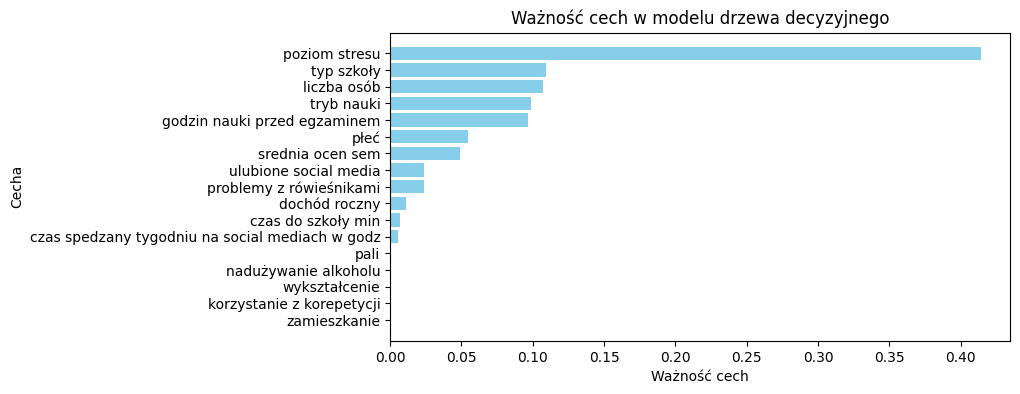

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Dane o ważności cech i ich nazwach
importances = model.feature_importances_
feature_names = ['płeć', 'pali', 'wykształcenie', 'liczba osób', 'typ szkoły',
       'dochód roczny', 'srednia ocen sem', 'tryb nauki', 'zamieszkanie',
       'problemy z rówieśnikami', 'czas do szkoły min',
       'godzin nauki przed egzaminem', 'nadużywanie alkoholu', 'poziom stresu',
       'korzystanie z korepetycji',
       'czas spedzany tygodniu na social mediach w godz',
       'ulubione social media']

# Tworzenie ramki danych z ważnością cech
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sortowanie ramki danych według ważności w kolejności malejącej
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Ważność cech')
plt.ylabel('Cecha')
plt.title('Ważność cech w modelu drzewa decyzyjnego')
plt.gca().invert_yaxis()  # Odwrócenie osi Y, aby najważniejsze cechy były na górze
plt.show()


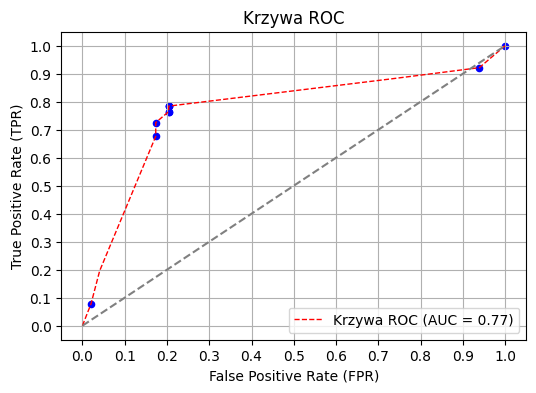

In [38]:

# Oblicz krzywą ROC i pole pod krzywą ROC (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, lw=1, color='red', linestyle='--', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
thresh_points = np.linspace(0, 1, num=10)
for thresh_point in thresh_points:
    index = np.argmin(np.abs(thresholds - thresh_point))
    plt.scatter(fpr[index], tpr[index], c='blue', s=20)
   # plt.annotate(f'{thresh_point:.2f}', (fpr[index], tpr[index]), textcoords="offset points", xytext=(20, -10), ha='center', fontsize=9)

plt.show()


Wyniki miar jakości klasyfikacji dla różnej wielkosci progu:



,Threshold,TP,FP,FN,TN,Accuracy,Precision,Recall,F1 Score
10,0.000000,0,98,0,102,0.510,0.510000,1.000000,0.675497
9,0.106383,6,92,8,94,0.500,0.505376,0.921569,0.652778
8,0.134831,26,72,12,90,0.580,0.555556,0.882353,0.681818
7,0.250000,78,20,22,80,0.790,0.800000,0.784314,0.792079
6,0.666667,78,20,24,78,0.780,0.795918,0.764706,0.780000
5,0.800000,81,17,28,74,0.775,0.813187,0.725490,0.766839
4,0.857143,81,17,31,71,0.760,0.806818,0.696078,0.747368
3,0.873134,81,17,33,69,0.750,0.802326,0.676471,0.734043
2,0.904762,94,4,82,20,0.570,0.833333,0.196078,0.317460
1,1.000000,96,2,94,8,0.520,0.800000,0.078431,0.142857


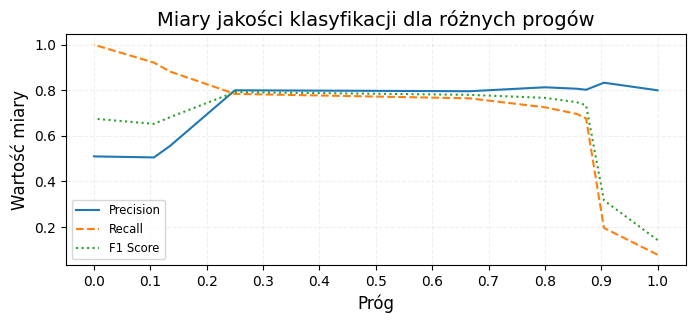

In [39]:

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

print("Wyniki miar jakości klasyfikacji dla różnej wielkosci progu:")
print()
# Testujemy różne progi
threshold_results = []
for thresh_point in thresholds:
    # Używamy wybranego progu do przekształcenia prawdopodobieństw na etykiety klasyfikacji
    y_test_pred_thresh = (y_test_proba >= thresh_point).astype(int)
    
    # Obliczamy miary jakości klasyfikacji dla danego progu
    accuracy = accuracy_score(y_test, y_test_pred_thresh)
    precision = precision_score(y_test, y_test_pred_thresh)
    recall = recall_score(y_test, y_test_pred_thresh)
    f1 = f1_score(y_test, y_test_pred_thresh)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    cm = confusion_matrix(y_test, y_test_pred_thresh)
    TP, FP, FN, TN = cm.ravel()
    threshold_results.append((thresh_point, TP, FP, FN, TN, accuracy, precision, recall, f1))
threshold_results_df = pd.DataFrame(threshold_results, columns=['Threshold', 'TP', 'FP', 'FN', 'TN','Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(threshold_results_df.sort_values(by='Threshold', ascending=True).head(20))
print()


# Tworzenie wykresu
plt.figure(figsize=(8, 3))
line_styles = ['-', '--', ':']  
metric_names = ['Precision', 'Recall', 'F1 Score']
for i, metric in enumerate([precision_scores, recall_scores, f1_scores]):
    plt.plot(thresholds, metric, label=metric_names[i], lw=1.5, linestyle=line_styles[i])
plt.legend(fontsize='small')
plt.xlabel('Próg', fontsize=12)
plt.ylabel('Wartość miary', fontsize=12)
plt.title('Miary jakości klasyfikacji dla różnych progów', fontsize=14)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.2)

plt.show()



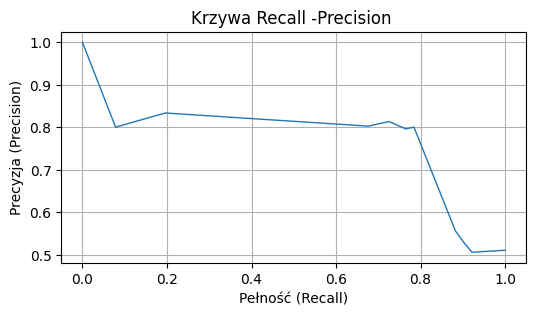

In [40]:
# Obliczamy krzywą precyzji-pełności dla różnych progów
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
plt.figure(figsize=(6, 3))
plt.plot(recall, precision, lw=1)
plt.xlabel('Pełność (Recall)')
plt.ylabel('Precyzja (Precision)')
plt.title('Krzywa Recall -Precision ')
plt.grid(True)
plt.show()

In [44]:
# Użyj wytrenowanego modelu na danych testowych przy ustalonym progu
y_test_pred = (y_test_proba >= 0.3).astype(int)

def score_test():
    cm_test = confusion_matrix(y_test, y_test_pred)
    TP, FP, FN, TN = cm_test.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_ratio = (FP + FN) / (TP + TN + FP + FN)
    precision_pos = TP / (TP + FP)
    precision_neg = TN / (TN + FN)
    recall_pos = TP / (TP + FN)
    recall_neg = TN / (TN + FP)
    f1_score = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    matthews_corrcoef_score = matthews_corrcoef(y_test, y_test_pred)
    data = {'miara': ['TP', 'FP', 'FN', 'TN','accuracy','error_ratio', 'precision_pos','precision_neg','recall_pos', 'recall_neg','f1_score',
                      'roc_auc_test','cohen_kappa','matthews_corrcoef_score'],
            'wartość': [TP, FP, FN, TN,accuracy,error_ratio, precision_pos,precision_neg,recall_pos, recall_neg,f1_score,
                        roc_auc_test,cohen_kappa,matthews_corrcoef_score]}
    df = pd.DataFrame(data).set_index('miara')
    return df

display(score_test().T)

miara,TP,FP,FN,TN,accuracy,error_ratio,precision_pos,precision_neg,recall_pos,recall_neg,f1_score,roc_auc_test,cohen_kappa,matthews_corrcoef_score
wartość,78.0,20.0,24.0,78.0,0.78,0.22,0.795918,0.764706,0.764706,0.795918,0.78,0.769358,0.560176,0.560624
